# Importing data from csv

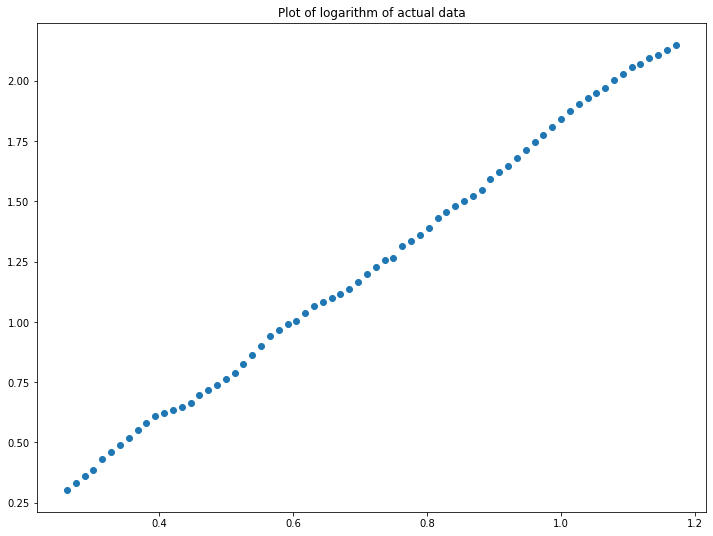

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)
#data=pd.read_csv("MA_covid_data.csv")
data=pd.read_csv("AL_covid_data.csv")

# setting parameters for the project
extension=15 # Number of days upto which we want to model cases
startIndex=20 
endIndex=90
extendStartIndex=startIndex-extension
extendEndIndex=endIndex+extension

# setting scale factors for better regression results
x_scalefactor=(0.2*startIndex+0.8*endIndex)
y_scalefactor=10000

# reading data from the csv
x_start=data.iloc[extendStartIndex:startIndex,0]
y_start=data.iloc[extendStartIndex:startIndex,1]
x=data.iloc[startIndex:endIndex,0]
y=data.iloc[startIndex:endIndex,1]
x_end=data.iloc[endIndex:extendEndIndex,0]
y_end=data.iloc[endIndex:extendEndIndex,1]

# fixing offset caused by iloc function
x_start=x_start-2
x=x-2
x_end=x_end-2

X=np.divide(x,x_scalefactor)
Y=np.log(np.divide(y,y_scalefactor))
#print(x)
plt.title("Plot of logarithm of actual data")
plt.scatter(X,Y)
plt.show()

# Regression algorithm

In [7]:
#y=g*x^6+f*x^5+e*x^4 + a*x^3 + b*x^2 + c*x + d
#errthr=0.00001

g=0
f=0
e=0
a=0
b=0
c=0
d=0
m=len(X)
alpha=0.08 # learning rate
for i in range(15000) : # Polynomial regression algorithm
  
  D_g = sum(X*X*X*X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_f = sum(X*X*X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_e = sum(X*X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_a = sum(X*X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_b = sum(X*X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_c = sum(X*(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y))/m
  D_d = sum(g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d-Y)/m
  tmp_g = g-alpha*D_g
  tmp_f = f-alpha*D_f
  tmp_e = e-alpha*D_e
  tmp_a = a-alpha*D_a
  tmp_b = b-alpha*D_b
  tmp_c = c-alpha*D_c
  tmp_d = d-alpha*D_d

  # This approach would have kept error for each coefficient under check, but practically it was taking up a lot of time
  #if abs(tmp_e-e)<errthr and abs(tmp_a-a)<errthr and abs(tmp_b-b)<errthr and abs(tmp_c-c)<errthr and abs(tmp_d-d)<errthr : 
   # break
  
  g=tmp_g
  f=tmp_f
  e=tmp_e
  a=tmp_a
  b=tmp_b
  c=tmp_c
  d=tmp_d

print(f'{g} {f} {e} {a} {b} {c} {d}')

-0.06664838062155065 -0.11067725096876484 -0.031218979088669604 0.22902080428688296 0.6898438526014761 1.1022793201509264 0.0231545194870943


# Plotting the regression polynomial

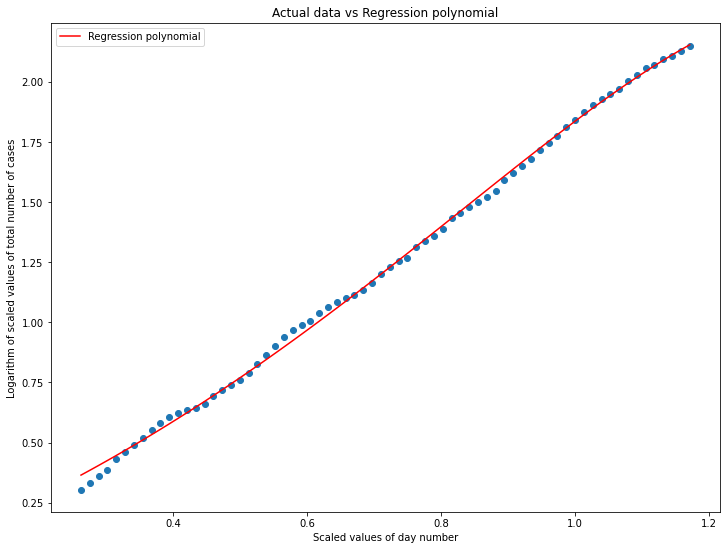

In [12]:
estimates=g*X*X*X*X*X*X+f*X*X*X*X*X+e*X*X*X*X+a*X*X*X+b*X*X+c*X+d # generates data over the regression range for plotting the polynomial
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(X,estimates,color='red',label='Regression polynomial')
plt.scatter(X,Y)
plt.xlabel("Scaled values of day number")
plt.ylabel("Logarithm of scaled values of total number of cases")
plt.title("Actual data vs Regression polynomial")
plt.legend()
plt.show()

# Conclusion

dict_keys([19, 90, 18, 91, 17, 92, 16, 93, 15, 94, 14, 95, 13, 96, 12, 97, 11, 98, 10, 99, 9, 100, 8, 101, 7, 102, 6, 103])
{19: 14122.324305738157, 90: 87869.42053477347, 18: 13850.92704953124, 91: 89548.18024399002, 17: 13588.622752535144, 92: 91173.378918428, 16: 13335.068075644358, 93: 92736.08408276858, 15: 13089.932892799727, 94: 94226.99288683555, 14: 12852.89984809171, 95: 95636.4735170737, 13: 12623.66391883931, 96: 96954.61517710947, 12: 12401.931985756371, 97: 98171.2870456593, 11: 12187.422411134792, 98: 99276.20651729555, 10: 11979.864625811368, 99: 100259.01690499726, 9: 11778.99872554022, 100: 101109.37463197754, 8: 11584.575077263991, 101: 101817.04576353525, 7: 11396.353935663117, 102: 102372.01152786064, 6: 11214.105070261749, 103: 102764.58224889997}


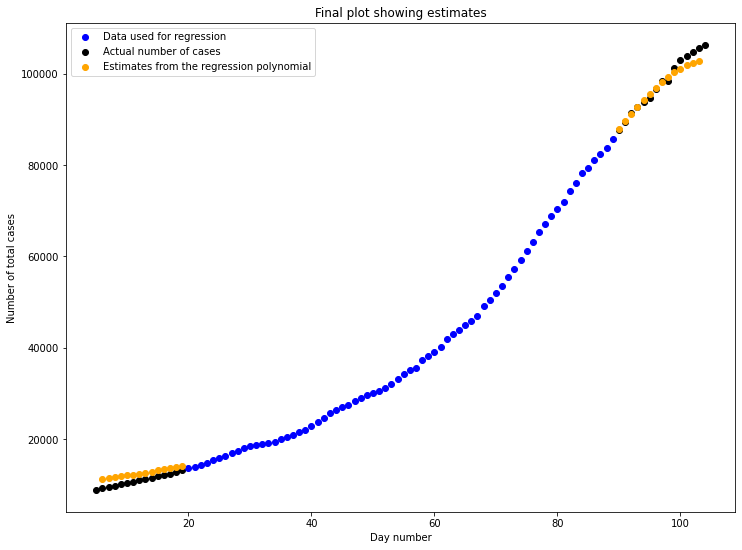

In [16]:
#prediction
import math
def predict(x) : #calculates the estimate for any particular day
  return y_scalefactor*(math.exp(g*x*x*x*x*x*x+f*x*x*x*x*x+e*x*x*x*x+a*x*x*x+b*x*x+c*x+d)) 
covid_data_predictions={}
for i in range(1,extension) :
  covid_data_predictions[(startIndex-i)]=predict((startIndex-i)/x_scalefactor)
  covid_data_predictions[(endIndex+i-1)]=predict((endIndex+i-1)/x_scalefactor)

print(covid_data_predictions.keys())
plt.scatter(x_start,y_start,color='black')
plt.scatter(x,y,label="Data used for regression",color='blue') #Data used for regression is plotted in blue color
plt.scatter(x_end,y_end,label="Actual number of cases",color='black') #Data used for comparing with the estimates is in black color
print(covid_data_predictions)
plt.scatter(covid_data_predictions.keys(),covid_data_predictions.values(),label="Estimates from the regression polynomial",color='orange') #Estimates will be in orange color
plt.xlabel("Day number")
plt.ylabel("Number of total cases")
plt.title("Final plot showing estimates")
plt.legend()
plt.show()